# Simple Neural Net: Matrix formation

This notebook is going to attempt to extend the original simple neural net into a maths format. Most of the work here will be in text and markdown, but we'll jump into some coding to see if we can make the original parts a bit more efficient or general.

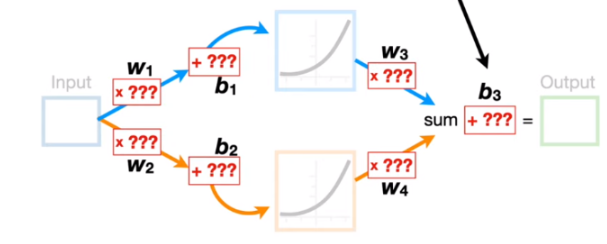

We're using this model again: credit: Youtube: Statquest - Neural Networks Pt. 2: Backpropagation Main Ideas   https://www.youtube.com/watch?v=IN2XmBhILt4&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=5

So we're gonna start with one value and end with one value. We want to represent as much of the middle bits as possible with matrices:

So we start with out input $x$ and we multiply by w1 and w2 separately

$$
\begin{pmatrix} w_1\\ w_2\end{pmatrix}^T(x) = \begin{pmatrix} w_1*x \\ w_2*x \end{pmatrix}
$$

Next we want to add the biases to get:

$$
\begin{pmatrix} w_1*x \\ w_2*x \end{pmatrix} + \begin{pmatrix} b_1\\ b_2\end{pmatrix}
$$

Then we have to apply the simplex algorithm (which isn't very representable as a matrix as far as I know). This operation will act on each row independently:

$$
simp\begin{pmatrix}\begin{pmatrix} w_1*x \\ w_2*x \end{pmatrix} + \begin{pmatrix} b_1\\ b_2\end{pmatrix}\end{pmatrix} = \begin{pmatrix} z_1\\ z_2\end{pmatrix}
$$

Now we want to bring these different parts back together with a matrix mulitplication of weights and then add our final bias term :

$$
\begin{pmatrix} z_1, z_2\end{pmatrix}\begin{pmatrix} w_3\\ w_4\end{pmatrix}+\begin{pmatrix} b_3 \end{pmatrix}  = z_1 * w_3 + z_2 * w_4 + b_3 = output
$$

Easy enough right

Now I want to break these ideas down a bit more and make it more general

Lets consider a neural network with 4 layers, ane each of those layers has 3 neurons which all take input from all of the previous layer's neurons and all have an effect on the next layer.

As before, I'm stealing diagrams, so here a lovely one from another youtube video:

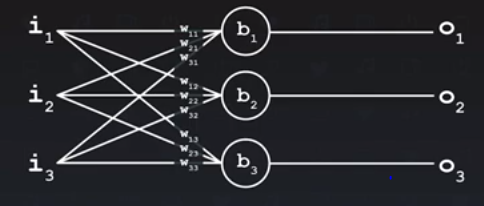

source: Youtube.com: Neural Networks Matrix Math and NumPy;https://www.youtube.com/watch?v=P8Xrj70qtyo

Things get a bit complicated when activation functions get involved, so we'll avoid them for now. Just focusing on the weights and biases acting on the inputs to get out outputs that will then be put through activation functions.

If we consider only the output $o_1$ for now, we can see that we have
$$
o_1 = i_1 *w_{11} + i_2*w_{21} + i_3 *w_{31} + b_1
$$

notice the lovely indexing of the wight $w_{kj}$ which connects $i_k$ to $o_j$.

Also notice the potential to turn this into the vector operation.

$$
o_1 =  \begin{pmatrix} i_1,i_2,i_3 \end{pmatrix} \cdot \begin{pmatrix} w_{11}, w_{21}, w_{31} \end{pmatrix}+ b1  = \begin{pmatrix}1,i_1,i_2,i_3 \end{pmatrix} \cdot \begin{pmatrix}b_1, w_{11}, w_{21}, w_{31}\end{pmatrix} =  \begin{pmatrix}1,i_1,i_2,i_3 \end{pmatrix} \begin{pmatrix}b_1 \\ w_{11} \\ w_{21} \\ w_{31}\end{pmatrix}
$$

crazy, I know.

Anyway, now we can do the scalable part which makes matrices fun, useful, and scary - all at the same time. This scalability comes from us including the other outputs in our calculation. It's easiest if I show it:

$$
 \begin{pmatrix}1,i_1,i_2,i_3 \end{pmatrix} \begin{pmatrix}b_1\ b_2\ b_3 \\ w_{11}\ w_{12}\ w_{13} \\ w_{21} \ w_{22} \ w_{23} \\ w_{31}\ w_{32}\ w_{33}\end{pmatrix} =
 \begin{pmatrix} o_1 \ o_2 \ o_3 \end{pmatrix}
$$

Now, even though we have to plug this into our actiavtion functions, we will still be able to optimise our matrix multiplication with linear algebra and computational parallelisation to minimise execution time, which is an exiciting prospect. Maybe I'll be able to run a 36 billion parameter network on my latop now, who knows.

But yeah, as I said, we still need to account for the component wise application of the activation function onto our output vector $o$. We'll have a look at optimising that too

I have recently learned, that as well as making my coding life easier in python, numpy actually makes matrix operations much more efficent. It does this with the help of a number of clever optimisation tricks which I don'f fully understand, but the good news is that I don't really have to.

This is because that from our perspective, we just need to use it correctly, which isn't all too difficult (I hope).

Now before I jump into coding this, I want to see if I can generalise it. For example, if we change the number of inputs to two, and the number of outputs to four, then can we represent it in a similar way?

Lets give it a go:

We'll start by looking at the first output again. We have

$$
o_1 = i_1 *w_{11} + i_2*w_{21} + b1
$$

we have the same dot product to vector operation as before to get

$$
o_1 =  \begin{pmatrix} i_1,i_2 \end{pmatrix} \cdot \begin{pmatrix} w_{11}, w_{21} \end{pmatrix}+ b_1  = \begin{pmatrix}1,i_1,i_2 \end{pmatrix} \cdot \begin{pmatrix}b_1, w_{11}, w_{21} \end{pmatrix} =  \begin{pmatrix}1,i_1,i_2  \end{pmatrix} \begin{pmatrix}b_1 \\ w_{11} \\ w_{21}\end{pmatrix}
$$

Now we can generalise to each output $j \in \{1, \dots, 4\}$: 

$$
o_j =  \begin{pmatrix} i_1,i_2 \end{pmatrix} \cdot \begin{pmatrix} w_{1j}, w_{2j} \end{pmatrix}+ b_j  = \begin{pmatrix}1,i_1,i_2 \end{pmatrix} \cdot \begin{pmatrix}b_j, w_{1j}, w_{2j} \end{pmatrix} =  \begin{pmatrix}1,i_1,i_2  \end{pmatrix} \begin{pmatrix}b_j \\ w_{1j} \\ w_{2j}\end{pmatrix}
$$

So in matrix form, this comes out to:

$$
 \begin{pmatrix}1\ i_1\ i_2 \end{pmatrix} \begin{pmatrix}b_1\ b_2\ b_3\ b_4 \\ w_{11}\ w_{12}\ w_{13}\ w_{14} \\ w_{21} \ w_{22} \ w_{23} \ w_{24} \end{pmatrix} =
 \begin{pmatrix} o_1 \ o_2 \ o_3 \ o_4 \end{pmatrix}
$$

If we compare this new matrix operation to the one for 3 inputs to 3 outputs, we can see some similarities.

$$
 \begin{pmatrix}1\ i_1\ i_2\ i_3 \end{pmatrix} \begin{pmatrix}b_1\ b_2\ b_3 \\ w_{11}\ w_{12}\ w_{13} \\ w_{21} \ w_{22} \ w_{23} \\ w_{31}\ w_{32}\ w_{33}\end{pmatrix} =
 \begin{pmatrix} o_1 \ o_2 \ o_3 \end{pmatrix}
$$

Firstly, the form of the inputs/ outputs are very similar, with only a chnage of adding/ removing entries in the row. Secondly, The operation matrices are very similar too, the main difference being the dimensions. These dimensions match the number of inputs and the number of outputs - for the original example, we have a $3\times3$ matrix, in the second we have a $4 \times 3$ matrix.


Before I generalise this. I want to move the input and output vectors into column form. We know that our operation works, so to do this all we need to do is transpose both sides. This gives:

$$
\begin{pmatrix}\begin{pmatrix}1\ i_1\ i_2 \end{pmatrix} \begin{pmatrix}b_1\ b_2\ b_3\ b_4 \\ w_{11}\ w_{12}\ w_{13}\ w_{14} \\ w_{21} \ w_{22} \ w_{23} \ w_{24} \end{pmatrix} \end{pmatrix}^T   =
\begin{pmatrix} o_1 \ o_2 \ o_3 \ o_4 \end{pmatrix}^T <=>  \begin{pmatrix}b_1\ w_{11} \ w_{21} \\  b_2\ w_{12}\ w_{22} \\ b_3 \ w_{13} \ w_{23} \\ b_4 \ w_{14} \ w_{24} \end{pmatrix} \begin{pmatrix}1 \\ i_1 \\ i_2 \end{pmatrix} =
 \begin{pmatrix} o_1 \\ o_2 \\ o_3 \\ o_4 \end{pmatrix}
$$

Now we get what I believe is the more general way of laying things out. For a layer with $N$ inputs and $M$ outputs, we get an ($(N+1) \times M$) matrix. The $+ 1$ coming from the bias colums. This gives us our ($(2 + 1)\times 4$) matrix for our example with $N = 2$ inputs and $M = 4$ outputs.


If we generalise this now, we have for each layer with $N$ inputs and $M$ outputs: 

$$
\begin{pmatrix}b_1\ w_{11} \ \cdots \ w_{N1} \\  b_2\ w_{12}\ \cdots \ w_{N2} \\ \vdots \ \vdots \ \ddots \ \vdots \\ b_M \ w_{1M} \ \cdots \ w_{NM} \end{pmatrix} \begin{pmatrix}1 \\ i_1 \\ \vdots \\i_N \end{pmatrix} =
 \begin{pmatrix} o_1 \\ \vdots \\ o_M \end{pmatrix}
$$

Giving us dimensions ($(N+1) \times M$) $\cdot$ ($(N+1) \times 1$) =  ($M \times 1$),

Now we're gonna attempt to make a python function that can do this operation for us for a general layer.


In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
i = np.array([1,2,2])
try:
    print(i.shape[1])
except: 
    print(i)

[1 2 2]


In [3]:
def softplus(x):
    '''
    this is our softplus activation function
    it is 1 dimensional in input and output
    '''
    return np.log(1 + np.exp(x))

In [4]:
def identity(x):
    return x

In [5]:
#Neural network layer function
def layer(inputstring, A,activation):
    '''
    runs through a layer of a neural network
    with matrix operations and an application of 
    an activation function
    
    
    :param: i, numpy array of N input values
            or numpy array of shape (K,N) for K
            instances of input values
    :param: A, weight/bias operation matrix , 
            shape (M, N+1)
    :param: activation function R -> R, applied
            to the output vector component wise.
            
    :returns: the output of the layer
    '''
    #this line accounts for inputting multiple inputs at once.
        
    '''
    try:
        #if i.shape[0] == 1 and i.shape[1] != 1:
        if i.shape[1] == 1:
            b = np.ones((i.shape[0],1))
            ib_arr = np.concatenate((b,i),axis = 1)
            print('here and i.shape = ', i.shape)
        else:
            b = np.ones((1,i.shape[1]))
            ib_arr = np.concatenate((b,i))
            print('here2 and i.shape = ', i.shape)
    except:
        b = [1]
        ib_arr = np.concatenate((b,i))
        print('here3 and i.shape = ', i.shape)
        
    '''    
    #format into a good form for concatenation
    i = np.transpose(inputstring)
    
    #try concatenation
    try:
        b = np.ones((1,i.shape[1]))
        ib_arr = np.concatenate((b,i))
        #print('here2 and i.shape = ', i.shape)
    except:
        b = [1]
        ib_arr = np.concatenate((b,i))
        #print('here3 and i.shape = ', len(i))
    
    #print(ib_arr.shape, A.shape)
    #print(ib_arr, A)
    assert ib_arr.shape[0] == A.shape[1], "Incorrect matrix/vector size"
    
    output = A@ib_arr
    
    return np.transpose(activation(output))
    

Now if we run this through a random imaginary layer, we get:

In [6]:
#testing for single values:
inputstring = np.array([[1],[1]]) 
# need to make sure its a float array normally

A = np.array([[1,4],[1,1],[1,2],[-3,-2]])

print(np.transpose(layer(inputstring,A,identity)))


[[ 5.  5.]
 [ 2.  2.]
 [ 3.  3.]
 [-5. -5.]]


In [7]:
#this works for arrays of shape (k,n) for n>= 1, k>=0
inputstring1 = np.array([[3,3]])
inputstring2 = np.array([[2,2],[3,3]])

A = np.array([[1,4,3],[1,1,3],[1,2,0.7],[-3,-2,3]])

print(np.transpose(layer(inputstring1,A,identity)))
print(np.transpose(layer(inputstring2,A,identity)))


#so we need the double [] all the time



[[22. ]
 [13. ]
 [ 9.1]
 [ 0. ]]
[[15.  22. ]
 [ 9.  13. ]
 [ 6.4  9.1]
 [-1.   0. ]]


This is cool and all, but we really want to see how this formulation of the problem compares to the other one. 

Lets go back to our primitive 2 layer forwards feed neural network from the proof of concept notebook and see if we can model it with this new formulation.


In [8]:
def NNmatrix(input):
    '''
    :param: input; input to the neural net
            can be array of shape (1,)
            or array of shape (1,k) where
            k inputs are processed at once
    '''
    
    #initialise weights
    w = [-30, -2.5, -1.3, 2.3]
    #initialise biases
    b = [2, 1.3, -0.78]
  
    #form the weight/bias arrays for each layer
    
    #layer 1 has one input and two outputs
    #so A_1's shape is (2,2)
    A_1 = np.array([
            [b[0], w[0]], 
            [b[1],w[1]]
          ])
    #layer 2 has two inputs and 1 outputs
    #so A_2's shape is (3,1)
    
    A_2 = np.array([[b[2],w[2],w[3]]])
    #note, we need the array to be a matrix - so we need
    #pour extra pair of square brackets even on matrices
    #with only one row or column
    
    #print(layer(input, A_1, activation = softplus))
    
    return layer(layer(input, A_1, activation = softplus), A_2, identity)
    

In [9]:
i = np.array([[2],[2]])
'''
b = np.ones((i.shape[0],1))

np.concatenate((b,i),axis = 1)
'''
NNmatrix(np.array([[3],[2],[2]]))

NNmatrix(np.array([2]))

array([-0.72382745])

In [10]:
#old function
def NN(x):
    '''
    this function runs a value x through our NN
    it will sequentially apply the weigths, biases
    and instances of the activation function, as well
    as managing divergence and convergence of paths
    in the network.
    '''

    #the ith weight is stored in weights[i-1]
    #the ith bias is stored in biases[i-1]
    #initialise weights
    weights = [-30, -2.5, -1.3, 2.3]
    #initialise biases
    biases = [2, 1.3, -0.78]
    
    
    #firstly x will diverge into two paths
    #we will name these p_1 and p_2
    
    
    #path 1 calculation
    p_1 = softplus(weights[0] * x + biases[0]) * weights[2] 
    
    #path 2 calculation
    p_2 = softplus(weights[1] * x + biases[1]) * weights[3] 
    
    #bring the paths back together through summation
    y = p_1 + p_2 
    
    #add the final bias
    y += biases[2]
    
    return y
    

In [11]:
print(NN(1), NNmatrix(np.array([1])))
print(NN(0.5), NNmatrix(np.array([0.5])))

-0.17445032512342695 [-0.17445033]
0.8724542520056506 [0.87245425]


As you can see, these two seem to be equivalent, if you need more convincing, we're about to make some more graphs, but before I do that, we need ot do a bit more maths.

With the original simple NN function, we could input an np array and that would be fine, but for the matrix function, we need to go back to the maths for a minute:




If we go back for our general form for each layer with $N$ inputs and $M$ outputs, we can try to incorporate multiple inputs in a mathematically integrated way: 

$$
\begin{pmatrix}b_1\ w_{11} \ \cdots \ w_{N1} \\  b_2\ w_{12}\ \cdots \ w_{N2} \\ \vdots \ \vdots \ \ddots \ \vdots \\ b_M \ w_{1M} \ \cdots \ w_{NM} \end{pmatrix} \begin{pmatrix}1 \\ i_1 \\ \vdots \\i_N \end{pmatrix} =
 \begin{pmatrix} o_1 \\ \vdots \\ o_M \end{pmatrix}
$$

Now if we want to add multiple inputs, we can handily just add columns to input vector to make a matrix. For example if we use 3 inputs as

$$
\begin{pmatrix}1 \ 1 \ 1 \\ i_{1_a} \ i_{1_b} \ i_{1_c} \\ \vdots \\ i_{N_a} \ i_{N_b} \ i_{N_c} \ \end{pmatrix}
$$

to give:

$$
\begin{pmatrix}b_1\ w_{11} \ \cdots \ w_{N1} \\  b_2\ w_{12}\ \cdots \ w_{N2} \\ \vdots \ \vdots \ \ddots \ \vdots \\ b_M \ w_{1M} \ \cdots \ w_{NM} \end{pmatrix} \begin{pmatrix}1 \ 1 \ 1 \\ i_{1_a} \ i_{1_b} \ i_{1_c} \\ \vdots \ \vdots \ \vdots \\ i_{N_a} \ i_{N_b} \ i_{N_c} \ \end{pmatrix} = \begin{pmatrix} o_{1_a} \ o_{1_b} \ o_{1_c} \\ \vdots \ \vdots \ \vdots \\ o_{M_a} \ o_{M_b} \ o_{M_c} \end{pmatrix}
$$

Leaves us with 4 outputs.

But more generally, our input matrix for $K$ inputs queries to a layer with N input nodes should look like this:

$$
\begin{pmatrix}1 \ 1 \ 1 \\ i_{1_a} \ \cdots \ i_{1_K} \\ \vdots \ \ddots \ \vdots \\ i_{N_a} \ \cdots \ i_{N_K} \ \end{pmatrix}
$$

Which is an ($N \times K$) matrix.


In [22]:
x = np.linspace(0,1,1001)



y = NNmatrix(np.transpose([x]))




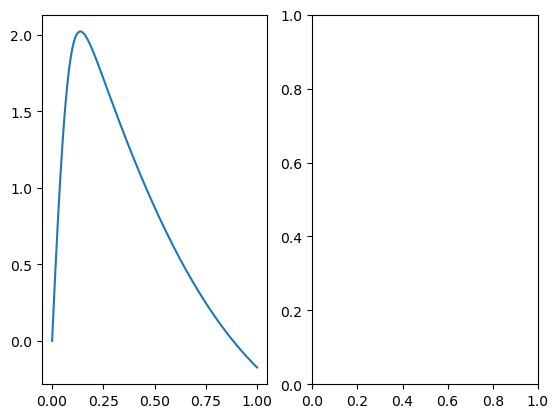

In [24]:
fig, ax = plt.subplots(1,2)

ax[0].plot(x,y)